In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle



In [2]:
%matplotlib inline

In [3]:
import os
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

In [4]:
df1 = pd.read_pickle('orig_final_343460.pkl')
type(df1)

pandas.core.frame.DataFrame

In [5]:
len(df1)

343460

In [6]:
pd.set_option('display.max_columns',30)
df1.head()

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,channel,ppm_flag,...,property_type,postal_code,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,servicer_name,super_confirm_flag,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr
0,799.0,201708,NA,203707,33340.0,0.0,1.0,P,65.0,31.0,230000.0,65.0,4.0,R,N,...,SF,53100.0,F117Q2000001,C,240,2.0,Other sellers,"PNCBANK,NATL",None,,,,0,0,0
1,794.0,201708,NA,204707,43580.0,0.0,1.0,I,73.0,44.0,80000.0,73.0,5.0,R,N,...,SF,51000.0,F117Q2000002,C,360,1.0,Other sellers,Other servicers,None,,,,0,0,0
2,806.0,201708,NA,204707,NaN,0.0,1.0,P,48.0,42.0,63000.0,48.0,4.0,R,N,...,SF,67900.0,F117Q2000003,N,360,1.0,Other sellers,Other servicers,None,,,,0,0,0
3,751.0,201707,NA,203206,33460.0,0.0,1.0,P,80.0,16.0,424000.0,80.0,3.0,R,N,...,SF,55000.0,F117Q2000004,C,180,2.0,Other sellers,Other servicers,None,,,,0,0,0
4,751.0,201707,NA,203206,33460.0,0.0,1.0,I,75.0,15.0,100000.0,75.0,4.0,R,N,...,CO,55100.0,F117Q2000005,N,180,2.0,Other sellers,Other servicers,None,,,,0,0,0


In [7]:
df1.describe()

,credit_score,msa_code,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,postal_code,borrower_cnt
count,343460.000000,308023.000000,343460.000000,343460.000000,343460.000000,343460.000000,3.434600e+05,343460.000000,343460.000000,343460.000000,343460.000000
mean,747.342114,30275.314012,6.986191,1.037311,75.169809,34.979734,2.372728e+05,74.804140,4.246561,56127.365923,1.498445
std,45.737103,11210.987896,11.891782,0.260833,16.279074,9.334860,1.210913e+05,16.332502,0.542076,29363.301916,0.499998
min,549.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,1.100000e+04,6.000000,2.000000,600.000000,1.000000
25%,714.000000,19380.000000,0.000000,1.000000,68.000000,28.000000,1.440000e+05,68.000000,4.000000,32100.000000,1.000000
50%,755.000000,31540.000000,0.000000,1.000000,80.000000,36.000000,2.160000e+05,80.000000,4.000000,55400.000000,1.000000
75%,786.000000,39820.000000,12.000000,1.000000,85.000000,43.000000,3.140000e+05,85.000000,5.000000,84000.000000,2.000000
max,843.000000,49740.000000,35.000000,4.000000,97.000000,50.000000,1.200000e+06,97.000000,6.000000,99900.000000,2.000000


In [8]:
pd.options.display.float_format = '{:.2f}'.format
df1.describe()

,credit_score,msa_code,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,postal_code,borrower_cnt
count,343460.00,308023.00,343460.00,343460.00,343460.00,343460.00,343460.00,343460.00,343460.00,343460.00,343460.00
mean,747.34,30275.31,6.99,1.04,75.17,34.98,237272.82,74.80,4.25,56127.37,1.50
std,45.74,11210.99,11.89,0.26,16.28,9.33,121091.35,16.33,0.54,29363.30,0.50
min,549.00,10180.00,0.00,1.00,6.00,1.00,11000.00,6.00,2.00,600.00,1.00
25%,714.00,19380.00,0.00,1.00,68.00,28.00,144000.00,68.00,4.00,32100.00,1.00
50%,755.00,31540.00,0.00,1.00,80.00,36.00,216000.00,80.00,4.00,55400.00,1.00
75%,786.00,39820.00,12.00,1.00,85.00,43.00,314000.00,85.00,5.00,84000.00,2.00
max,843.00,49740.00,35.00,4.00,97.00,50.00,1200000.00,97.00,6.00,99900.00,2.00


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


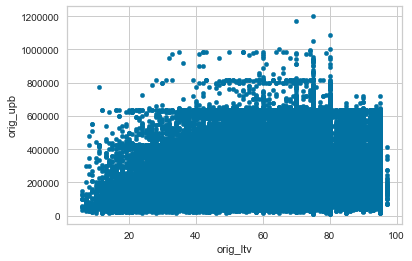

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df1.plot("orig_ltv", "orig_upb", kind= "scatter")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013F1105ACC0>,
      dtype=object)

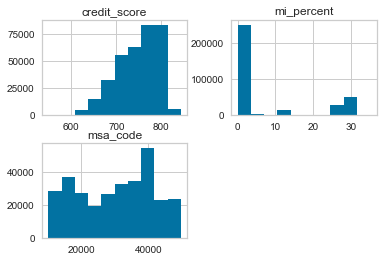

In [10]:
df1.hist(column = ["credit_score","msa_code","mi_percent"])

In [11]:

dataset=df1
features = ['credit_score', 'mi_percent','property_type','borrower_cnt','orig_upb','orig_ltv']
target   = ['curr_ln_delq_stas_1yr']

X = dataset[features]
y = dataset[target]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


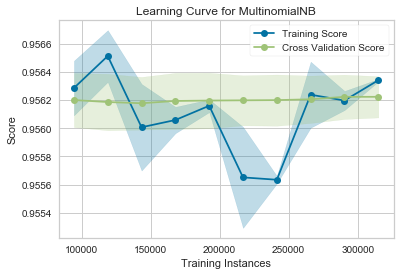

In [12]:
# Encode the categorical data
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=6
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [13]:
dataset=df1
features = ['credit_score', 'mi_percent','property_type']
target   = ['borrower_cnt']

X = dataset[features]
y = dataset[target]

In [ ]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y.ravel(), **kwargs)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))# Try them all!

models = [
    SVC(gamma='auto'), NuSVC(gamma='auto') 
]

for model in models:
    score_model(X, y, model)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Try them all!

models = [
    SVC(gamma='auto'), NuSVC(gamma='auto')
]

for model in models:
    score_model(X, y, model)
    
    

In [ ]:
# Try them all!

models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X, y, model)

In [ ]:
df1.dtypes

In [ ]:
sns.lmplot(x = "credit_score", y = "orig_int_rate", data=df1 )    

In [ ]:
sns.lmplot(y="orig_upb", x="orig_ltv", data=df1, fit_reg=False, hue="occupancy_status")

In [ ]:
sns.set_style("whitegrid")
sns.violinplot(x="occupancy_status", y="orig_upb", data=df1)

In [ ]:
sns.distplot(df1["orig_ltv"])

In [ ]:
sns.jointplot(df1["orig_upb"], df1["orig_ltv"])

In [ ]:
sns.lmplot(x="orig_upb", y="orig_ltv", data=df1, fit_reg=False, hue="curr_ln_delq_stas_1yr")

In [ ]:
sns.lmplot(x="orig_upb", y="orig_ltv", data=df1, fit_reg=False, hue="curr_ln_delq_stas_1yr")